In [134]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# from sklearn import datasets
# digits = datasets.load_digits()

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
x, y = mnist['data'], mnist['target']
# x = digits.data 
# y = digits.target

In [137]:
x.shape,y.shape

((70000, 784), (70000,))

In [138]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [141]:
some_digit = x.iloc[360]
some_digit_image = some_digit.values.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

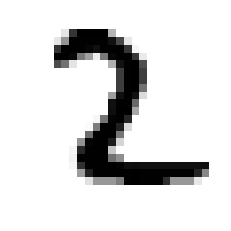

In [142]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [143]:
y[360]

'2'

In [144]:
x_train, x_test = x[0:6000], x[6000:7000]   

In [145]:
y_train, y_test = y[0:6000], y[6000:7000]

In [147]:
import numpy as np
shuffle_index = np.random.permutation(6000)   # array with index from 0 to 5999
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]   # shuffling the index and taking that values

## Creating a 2 detector

In [148]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)           
y_test_2 = (y_test==2)

In [149]:
y_train_2                                    # train data of label will always be in boolean form (binary classifier)

2258    False
4622    False
3230    False
4815    False
3109    False
        ...  
3010    False
5215    False
5117    False
1078    False
2571    False
Name: class, Length: 6000, dtype: bool

# 1. Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1, solver='lbfgs')  # choose the solver for dataset , by default : 'lbfgs'
                                                     # Tolerance for stopping criteria , float, default=1e-4     

In [151]:
clf.fit(x_train, y_train_2)    

LogisticRegression(tol=0.1)

In [152]:
clf.predict([some_digit])

array([ True])

## Performance Measures

In [153]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

In [154]:
accuracy

array([0.96 , 0.958, 0.957])

In [155]:
accuracy.mean()           # 95% accuracy = pretty easy when 95% of digits aren't two
                          # Accuracy not a good metric for classifiers - esp those with skewed datasets.

0.9583333333333334

## Confusion Matrix - a better way of evaluating a classifier

In [156]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)   
# divide the dataset into 3 parts and used in different ratio for test and train data

In [157]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [158]:
# Calculating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[5282,  137],
       [ 113,  468]], dtype=int64)

## Calculating the Precision , Recall , F1 score

In [159]:
# Calculating precision = TP / (TP + FP)
from sklearn.metrics import precision_score
precision_score(y_train_2, y_train_pred)

0.7735537190082644

In [160]:
# Calculating recall = TP / (TP + FN)
from sklearn.metrics import recall_score
recall_score(y_train_2, y_train_pred)

0.8055077452667814

In [161]:
# Calculating F1 - score = (2 * P * R) / (P + R)
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.7892074198988195

precision/recall tradeoff: increasing one reduces the other

## Precision Recall Curve

In [162]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")
y_scores

array([-191.40875325,  -51.15958824,  -20.99318811, ..., -131.04938513,
       -168.59604266, -462.39635604])

In [163]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [164]:
precisions

array([0.10491152, 0.10474986, 0.10476879, ..., 1.        , 1.        ,
       1.        ])

In [165]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [166]:
thresholds

array([-213.92856412, -213.61443747, -213.33867793, ...,  184.45598235,
        199.69175084,  201.00020116])

## Plotting the Precision Recall Curve

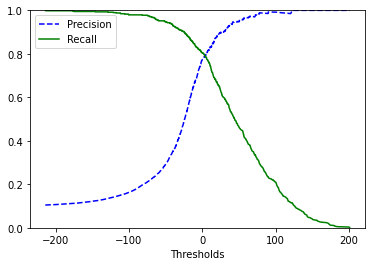

In [167]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

# 2. SGDClassifier

In [168]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_2)

SGDClassifier(random_state=42)

In [169]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

In [170]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(sgd_clf, x_train, y_train_2, cv=3, scoring="accuracy")

In [171]:
accuracy

array([0.9635, 0.9575, 0.9655])

In [172]:
accuracy.mean() 

0.9621666666666666

## Confusion Matrix - a better way of evaluating a classifier

In [173]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_2, cv=3)

In [174]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[5347,   72],
       [ 155,  426]], dtype=int64)

## Calculating the Precision , Recall , F1 score

In [176]:
# Calculating precision = TP / (TP + FP)
from sklearn.metrics import precision_score
precision_score(y_train_2, y_train_pred)

0.8554216867469879

In [177]:
# Calculating recall = TP / (TP + FN)
from sklearn.metrics import recall_score
recall_score(y_train_2, y_train_pred)

0.7332185886402753

In [178]:
# Calculating F1 - score = (2 * P * R) / (P + R)
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.7896200185356811

## Precision Recall Curve

In [179]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, x_train, y_train_2, cv=3, method="decision_function")
y_scores

array([-1683350.46825234,  -554319.92321411,  -249514.71766096, ...,
        -684001.58791629,  -823802.6938495 , -2212913.20416766])

In [180]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [181]:
precisions

array([0.09916368, 0.0990099 , 0.09902681, ..., 1.        , 1.        ,
       1.        ])

In [182]:
recalls

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [183]:
thresholds

array([-2377232.58914823, -2370659.45701942, -2369599.4079002 , ...,
        1278856.71938342,  1379638.21439163,  1573540.87531389])

## Plotting the Precision Recall Curve

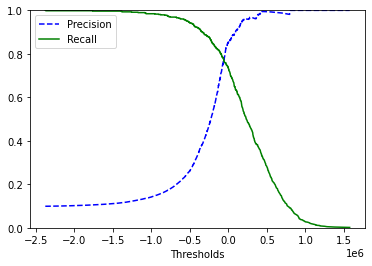

In [184]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

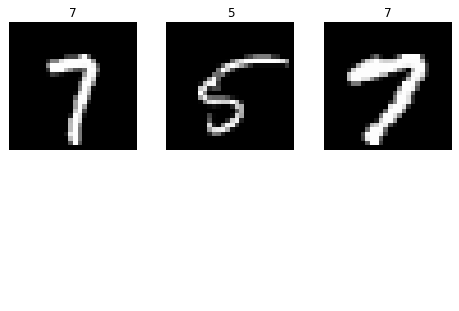

In [233]:
def plot_images(images, labels):
    n_cols = min(5,len(images))
    n_rows = len(images)
    
    
    fig = plt.figure(figsize=(8,8))

    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()
    
p = np.random.permutation(len(x))
p = p[:3]
plot_images(x.iloc[p].values.reshape(-1,28,28),y.iloc[p].values)

In [235]:
from sklearn.metrics import classification_report
predictions = sgd_clf.predict(x_test)
print(classification_report(y_test_2,predictions))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       906
        True       0.84      0.87      0.85        94

    accuracy                           0.97      1000
   macro avg       0.91      0.93      0.92      1000
weighted avg       0.97      0.97      0.97      1000

